In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,r2_score
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import data_cleaning_visualization as cv
cleaner=cv.DataCleaningAndVisualization()

In [19]:
df = pd.read_csv('train.csv')
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [20]:
cleaner.data_info(df)

,Col,dtype,n_uniques,n_nan,unique_val,duplicated
0,ID,object,100000,0,"[0x1602, 0x19c88, 0x19caa, 0x19ca5, 0x19ca4, 0...",0
1,Customer_ID,object,12500,0,"[CUS_0xd40, CUS_0x9bf4, CUS_0x5ae3, CUS_0xbe9a...",0
2,Month,object,8,0,"[January, February, March, April, May, June, J...",0
3,Name,object,10139,9985,"[Langep, Stevex, Vaughanl, Jessicad, Raymondr,...",0
4,Age,object,1788,0,"[38, 28, 31, 26, 32, 25, 36, 35, 34, 27]",0
5,SSN,object,12501,0,"[#F%$D@*&8, 078-73-5990, 486-78-3816, 750-67-7...",0
6,Occupation,object,16,0,"[_______, Lawyer, Architect, Engineer, Scienti...",0
7,Annual_Income,object,18940,0,"[36585.12, 20867.67, 17273.83, 9141.63, 33029....",0
8,Monthly_Inhand_Salary,float64,13235,15002,"[6769.13, 6358.956666666666, 2295.058333333333...",0
9,Num_Bank_Accounts,int64,943,0,"[6, 7, 8, 4, 5, 3, 9, 10, 1, 0]",0


In [21]:
cat_columns = ['Credit_Mix','Payement_Behaviour','Month','Payment_of_Min_Amount	']

In [22]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [23]:
df=df.dropna()

In [24]:
df.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

Column 'ID' is not categorical.
Column 'Customer_ID' is not categorical.
Column 'Name' is not categorical.
Column 'Age' is not categorical.
Column 'SSN' is not categorical.
Column 'Occupation' is not categorical.
Column 'Annual_Income' is not categorical.
Column 'Monthly_Inhand_Salary' is not categorical.
Column 'Num_Bank_Accounts' is not categorical.
Column 'Num_Credit_Card' is not categorical.
Column 'Interest_Rate' is not categorical.
Column 'Num_of_Loan' is not categorical.
Column 'Type_of_Loan' is not categorical.
Column 'Delay_from_due_date' is not categorical.
Column 'Num_of_Delayed_Payment' is not categorical.
Column 'Changed_Credit_Limit' is not categorical.
Column 'Num_Credit_Inquiries' is not categorical.
Column 'Outstanding_Debt' is not categorical.
Column 'Credit_Utilization_Ratio' is not categorical.
Column 'Credit_History_Age' is not categorical.
Column 'Total_EMI_per_month' is not categorical.
Column 'Amount_invested_monthly' is not categorical.
Column 'Monthly_Balance'

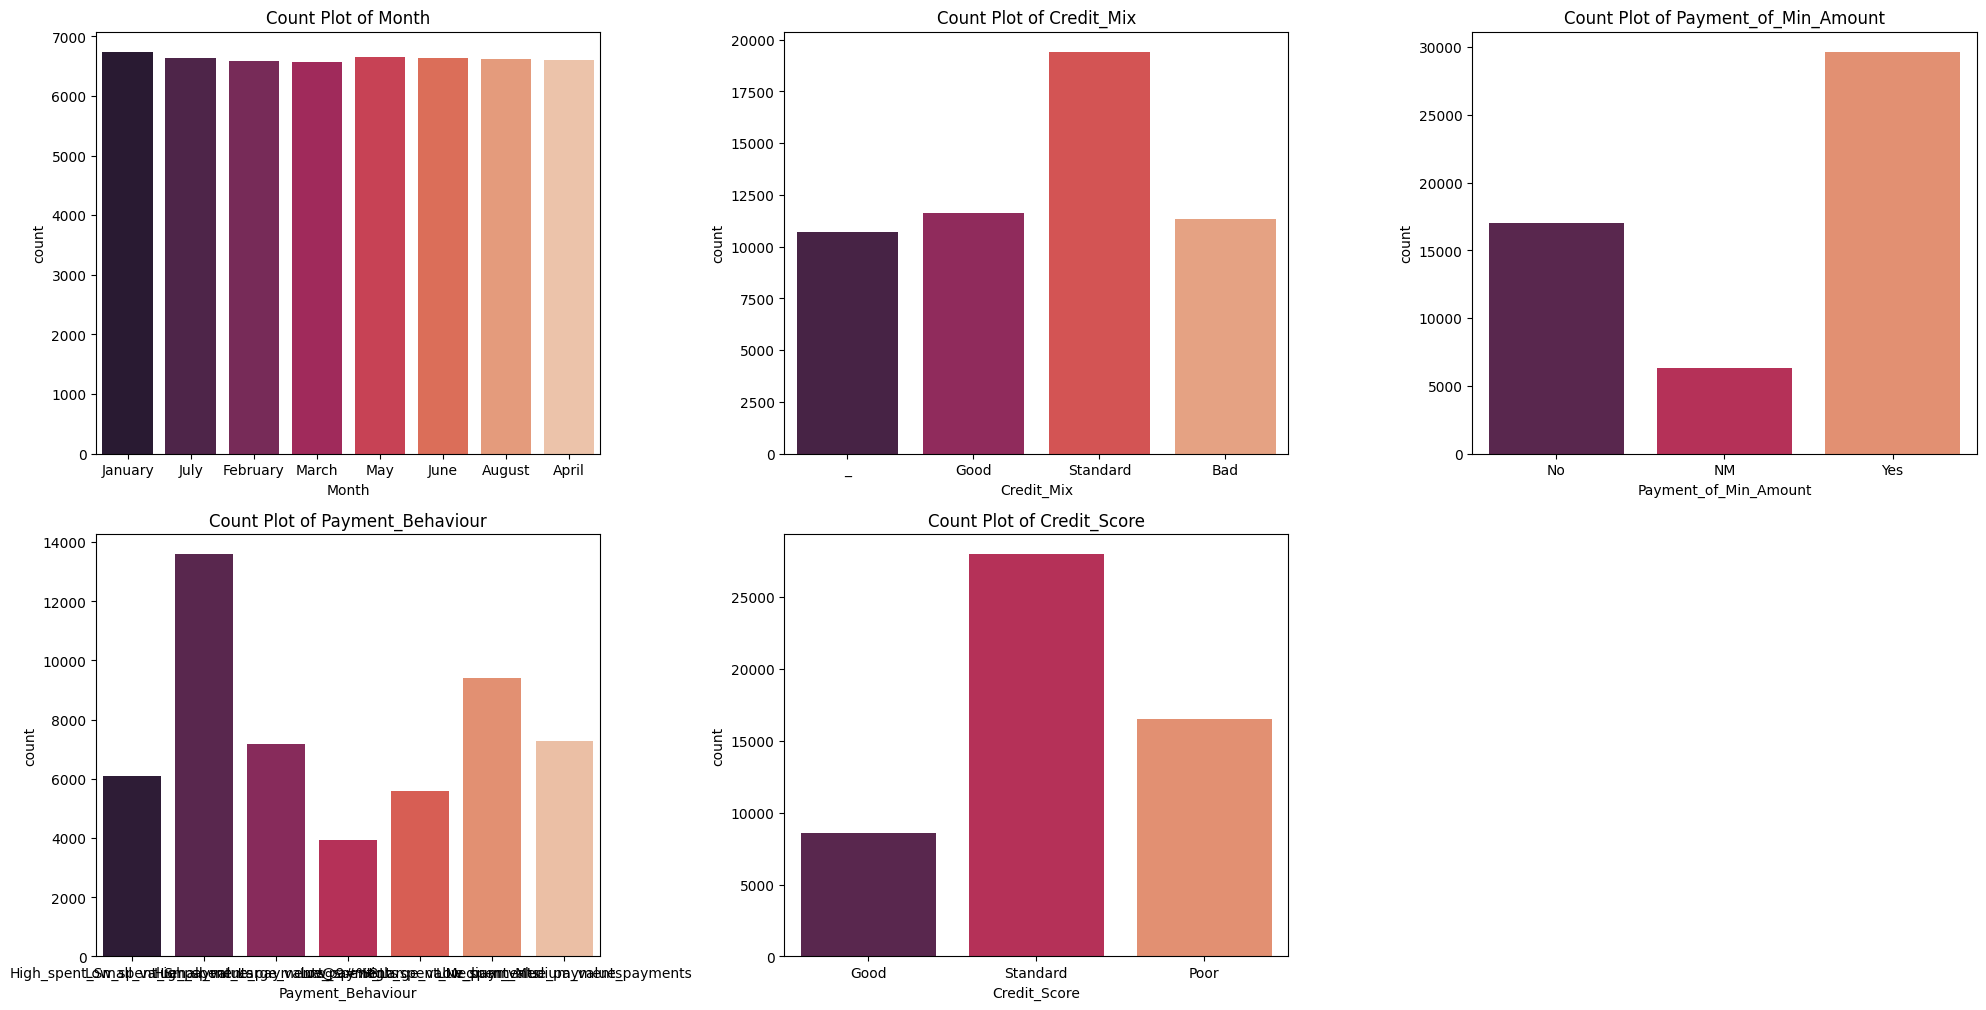

In [25]:
cleaner.categorical_plot(df,df.columns,8)

In [26]:
df=df.drop(['Monthly_Balance','Amount_invested_monthly','Credit_Utilization_Ratio','SSN','Name','Customer_ID','ID'],axis=1)

In [27]:
cat_columns = ['Credit_Mix', 'Payment_Behaviour', 'Month', 'Payment_of_Min_Amount','Occupation']

In [28]:
df = pd.get_dummies(df, columns=cat_columns, drop_first=True, dtype=int)

In [29]:
df['Credit_Score'] = df['Credit_Score'].map({'Poor': 0, 'Standard': 1, 'Good': 2})

In [30]:
df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Occupation________
0,23,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,...,0,0,0,0,0,0,1,0,0,0
6,23,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,...,0,0,0,0,0,0,1,0,0,0
8,28_,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,...,0,0,0,0,0,0,0,0,0,1
9,28,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,1,...,0,0,0,0,0,0,0,1,0,0
10,28,34847.84_,3037.986667,2,1385,6,1,Credit-Builder Loan,3,-1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,6,...,0,0,0,1,0,0,0,0,0,0
99995,25,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7,...,0,0,0,1,0,0,0,0,0,0
99996,25,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7,...,0,0,0,1,0,0,0,0,0,0
99997,25,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,...,0,0,0,1,0,0,0,0,0,0


In [31]:
def extract_years_months(duration):
    years = 0
    months = 0
    year_match = re.search(r'(\d+)\s*Years?', duration)
    month_match = re.search(r'(\d+)\s*Months?', duration)
    if year_match:
        years = int(year_match.group(1))
    if month_match:
        months = int(month_match.group(1))
    return years, months
df[['Years', 'Months']] = df['Credit_History_Age'].apply(lambda x: pd.Series(extract_years_months(x)))
df.drop(columns=['Credit_History_Age'], inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53049 entries, 0 to 99999
Data columns (total 50 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 53049 non-null  object 
 1   Annual_Income                                       53049 non-null  object 
 2   Monthly_Inhand_Salary                               53049 non-null  float64
 3   Num_Bank_Accounts                                   53049 non-null  int64  
 4   Num_Credit_Card                                     53049 non-null  int64  
 5   Interest_Rate                                       53049 non-null  int64  
 6   Num_of_Loan                                         53049 non-null  object 
 7   Type_of_Loan                                        53049 non-null  object 
 8   Delay_from_due_date                                 53049 non-null  int64  
 9   

In [33]:
df.drop(columns=['Type_of_Loan'], inplace=True)

In [34]:
columns = ['Outstanding_Debt', 'Changed_Credit_Limit','Num_of_Delayed_Payment','Num_of_Loan','Annual_Income','Age']


In [35]:
for column in columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [36]:
df.dtypes

Age                                                   float64
Annual_Income                                         float64
Monthly_Inhand_Salary                                 float64
Num_Bank_Accounts                                       int64
Num_Credit_Card                                         int64
Interest_Rate                                           int64
Num_of_Loan                                           float64
Delay_from_due_date                                     int64
Num_of_Delayed_Payment                                float64
Changed_Credit_Limit                                  float64
Num_Credit_Inquiries                                  float64
Outstanding_Debt                                      float64
Total_EMI_per_month                                   float64
Credit_Score                                            int64
Credit_Mix_Good                                         int64
Credit_Mix_Standard                                     int64
Credit_M

In [38]:
df.isna().sum()

Age                                                   2626
Annual_Income                                         3628
Monthly_Inhand_Salary                                    0
Num_Bank_Accounts                                        0
Num_Credit_Card                                          0
Interest_Rate                                            0
Num_of_Loan                                           2528
Delay_from_due_date                                      0
Num_of_Delayed_Payment                                1538
Changed_Credit_Limit                                  1102
Num_Credit_Inquiries                                     0
Outstanding_Debt                                       559
Total_EMI_per_month                                      0
Credit_Score                                             0
Credit_Mix_Good                                          0
Credit_Mix_Standard                                      0
Credit_Mix__                                            

In [37]:
mean_columns = ['Total_EMI_per_month', 'Changed_Credit_Limit', 'Age', 'Annual_Income', 'Age','Outstanding_Debt']
mode_columns = ['Num_of_Loan', 'Num_of_Delayed_Payment']

In [39]:
for column in mean_columns:
    df[column].fillna(df[column].mean(), inplace=True)

for column in mode_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [40]:
x=df.drop('Credit_Score',axis=1)
y=df['Credit_Score']

In [41]:
x.isna().sum()

Age                                                   0
Annual_Income                                         0
Monthly_Inhand_Salary                                 0
Num_Bank_Accounts                                     0
Num_Credit_Card                                       0
Interest_Rate                                         0
Num_of_Loan                                           0
Delay_from_due_date                                   0
Num_of_Delayed_Payment                                0
Changed_Credit_Limit                                  0
Num_Credit_Inquiries                                  0
Outstanding_Debt                                      0
Total_EMI_per_month                                   0
Credit_Mix_Good                                       0
Credit_Mix_Standard                                   0
Credit_Mix__                                          0
Payment_Behaviour_High_spent_Large_value_payments     0
Payment_Behaviour_High_spent_Medium_value_paymen

In [42]:
y.isna().sum()

0

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [45]:
log.score(x_train,y_train)

0.552204340347322

In [46]:
log.score(x_test,y_test)

0.545617342130066

In [47]:
y_pred_test=log.predict(x_test)
y_pred_train=log.predict(x_train)

In [48]:
mse_test=mean_squared_error(y_test,y_pred_test)
mse_train=mean_squared_error(y_train,y_pred_train)

In [49]:
print(mse_test)
print(mse_train)

0.5010367577756834
0.49211809891844766


In [50]:
DTC = DecisionTreeClassifier(max_depth=5,random_state=42,criterion='entropy')
DTC.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [51]:
DTC.score(x_train,y_train)

0.6872216593227927

In [52]:
DTC.score(x_test,y_test)

0.6889726672950047

In [53]:
y_pred_test=DTC.predict(x_test)
y_pred_train=DTC.predict(x_train)

In [54]:
mse_test=mean_squared_error(y_test,y_pred_test)
mse_train=mean_squared_error(y_train,y_pred_train)

In [55]:
print(mse_test)
print(mse_train)

0.4232799245994345
0.42206461038195997


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

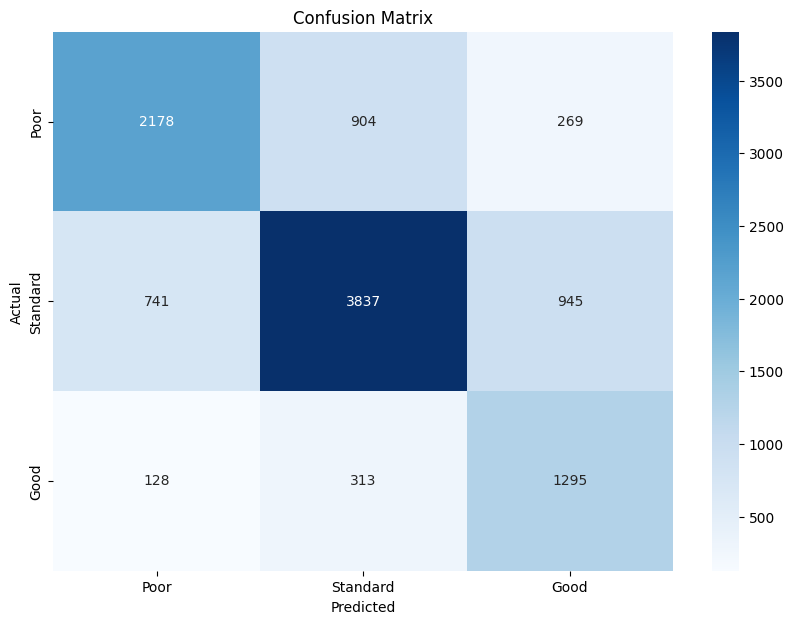

              precision    recall  f1-score   support

        Poor       0.71      0.65      0.68      3351
    Standard       0.76      0.69      0.73      5523
        Good       0.52      0.75      0.61      1736

    accuracy                           0.69     10610
   macro avg       0.66      0.70      0.67     10610
weighted avg       0.71      0.69      0.69     10610



In [60]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_test)
labels = ['Poor', 'Standard', 'Good']
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_test, target_names=labels))